# Analysis of SMPS data for HAGiS 

This is includes some analysis of the HAGiS SMPS data.

In [1]:
import atmPy.instruments.DMA.smps as smps
import atmPy.instruments.DMA.dma as dma
import pandas as pd
from matplotlib.dates import date2num
from matplotlib import colors
import matplotlib.pyplot as plt
from numpy import meshgrid
from matplotlib import rc
from matplotlib import dates
import numpy as np
# Plots will be in the notebook
%matplotlib inline

In [2]:
hagis = smps.SMPS(dma.NoaaWide())

Taking a look at data from March 20th.

In [3]:
hagis.openFiles()

Set the lag to 10 s - I think this should be correct.

In [4]:
# Process files selected
hagis.lag = 12
hagis.proc_files()

C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150305_16_26_00.txt
C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150304_21_00_08.txt
Unexpected error: <class 'ValueError'>
Issue processing file C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150304_21_00_08.txt
C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150304_21_10_28.txt
Unexpected error: <class 'ValueError'>
Issue processing file C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150304_21_10_28.txt
C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150304_21_20_48.txt
Unexpected error: <class 'ValueError'>
Issue processing file C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150304_21_20_48.txt
C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150304_21_31_08.txt
Unexpected error: <class 'ValueError'>
Issue processing file C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150304_21_31_08.txt
C:/Users/mrichardson/Documents/HAGIS/SMPS/Scans/SCAN_20150304_21_41_29.txt
Unexpe

C:\Anaconda3\lib\site-packages\pandas\core\index.py:687: FutureWarning: slice indexers when using iloc should be integers and not floating point
  "and not floating point",FutureWarning)


## Examination of the Lag

Take a look at the lag for several different periods.  During these periods, we actually get a good lag from the correlation and they all seem to agree.  The value is 7 seconds.

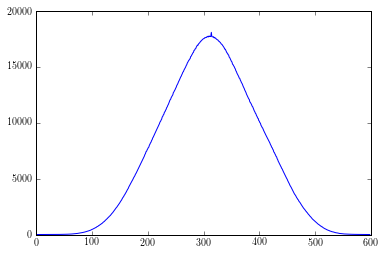

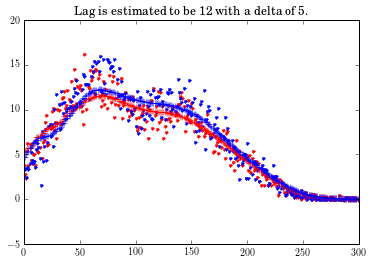

In [56]:
hagis.getLag(15, delta=5)

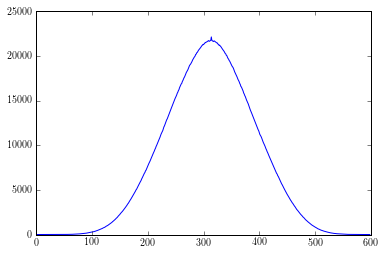

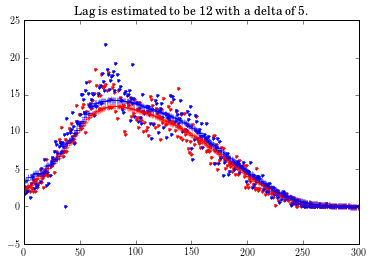

In [55]:
hagis.getLag(20, delta=5)

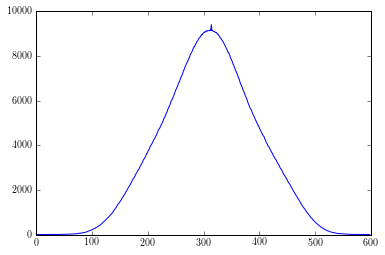

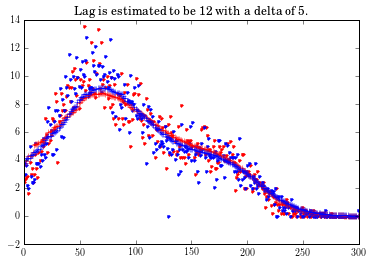

In [52]:
hagis.getLag(6, delta = 5)

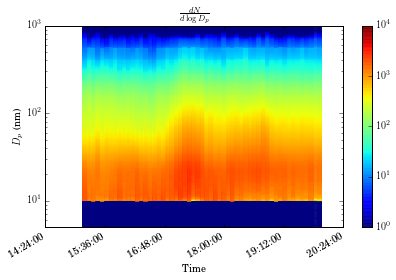

In [54]:
xfmt = dates.DateFormatter('%H:%M:%S')

xi = date2num(hagis.date)
XI, YI = meshgrid(xi, hagis.diam_interp)
Z = hagis.dn_interp.transpose()
Z[np.where(Z <= 0)] = np.nan
dataframe = pd.DataFrame(hagis.dn_interp)
dataframe.index = hagis.date
pmax = 10**4
pmin = 1


rc('text', usetex=True)
rc('font', family='serif')
fig, ax = plt.subplots()
pc = ax.pcolor(XI, YI, Z, cmap=plt.cm.jet, 
               norm=colors.LogNorm(pmin, pmax, clip=False), alpha=0.8)

plt.colorbar(pc)
plt.yscale('log')
plt.ylim(5, 1000)
plt.ylabel(r"\textbf{$D_p$} (nm)")
plt.xlabel("Time")
ax.xaxis.set_major_formatter(xfmt)
plt.title(r"$\frac{dN}{d\log{D_p}}$ ")
fig.autofmt_xdate()
fig.tight_layout()
